In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

/Users/kirtisailinaidu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("/Users/kirtisailinaidu/Downloads/SVM/mushroom.csv")

In [3]:
df1 = df.copy()

In [4]:
df1.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [5]:
df1.shape

(2000, 26)

In [6]:
df1[df1.columns[0:11]].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2000.0,624.974,375.091938,0.0,290.0,607.0,957.25,1279.0


In [7]:
df1[df1.columns[0:11]].isnull().sum()

Unnamed: 0         0
cap_shape          0
cap_surface        0
cap_color          0
bruises            0
odor               0
gill_attachment    0
gill_spacing       0
gill_size          0
gill_color         0
stalk_shape        0
dtype: int64

In [9]:
import pandas as pd
import numpy as np

selected_columns = df1[df1.columns[0:11]]

numeric_columns = selected_columns.select_dtypes(include=[np.number])
corr = numeric_columns.corr()
print(corr)

            Unnamed: 0
Unnamed: 0         1.0


<Axes: >

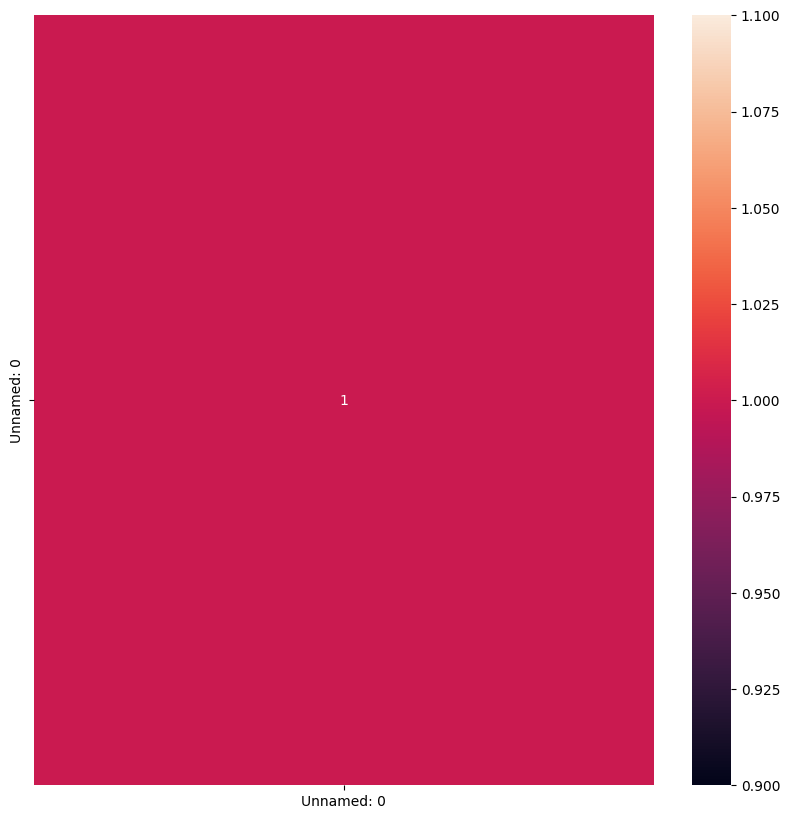

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [12]:
import seaborn as sns
import pandas as pd

print(df1.columns)

if 'area' in df1.columns:
    ax = sns.boxplot(x=df1['area'])
else:
    print("Column 'area' does not exist in the DataFrame")

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')
Column 'area' does not exist in the DataFrame


In [13]:
plt.rcParams["figure.figsize"] = 9,5

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df1.columns)

if 'area' in df1.columns:
    plt.figure(figsize=(16,5))
    print("Skew: {}".format(df1['area'].skew()))
    print("Kurtosis: {}".format(df1['area'].kurtosis()))
    ax = sns.kdeplot(df1['area'], shade=True, color='g')
    plt.xticks([i for i in range(0, 1200, 50)])
    plt.show()
else:
    print("Column 'area' does not exist in the DataFrame")

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')
Column 'area' does not exist in the DataFrame


In [17]:
dfa = df1[df1.columns[0:10]]
month_colum = dfa.select_dtypes(include='object').columns.tolist()

ValueError: num must be an integer with 1 <= num <= 4, not 5

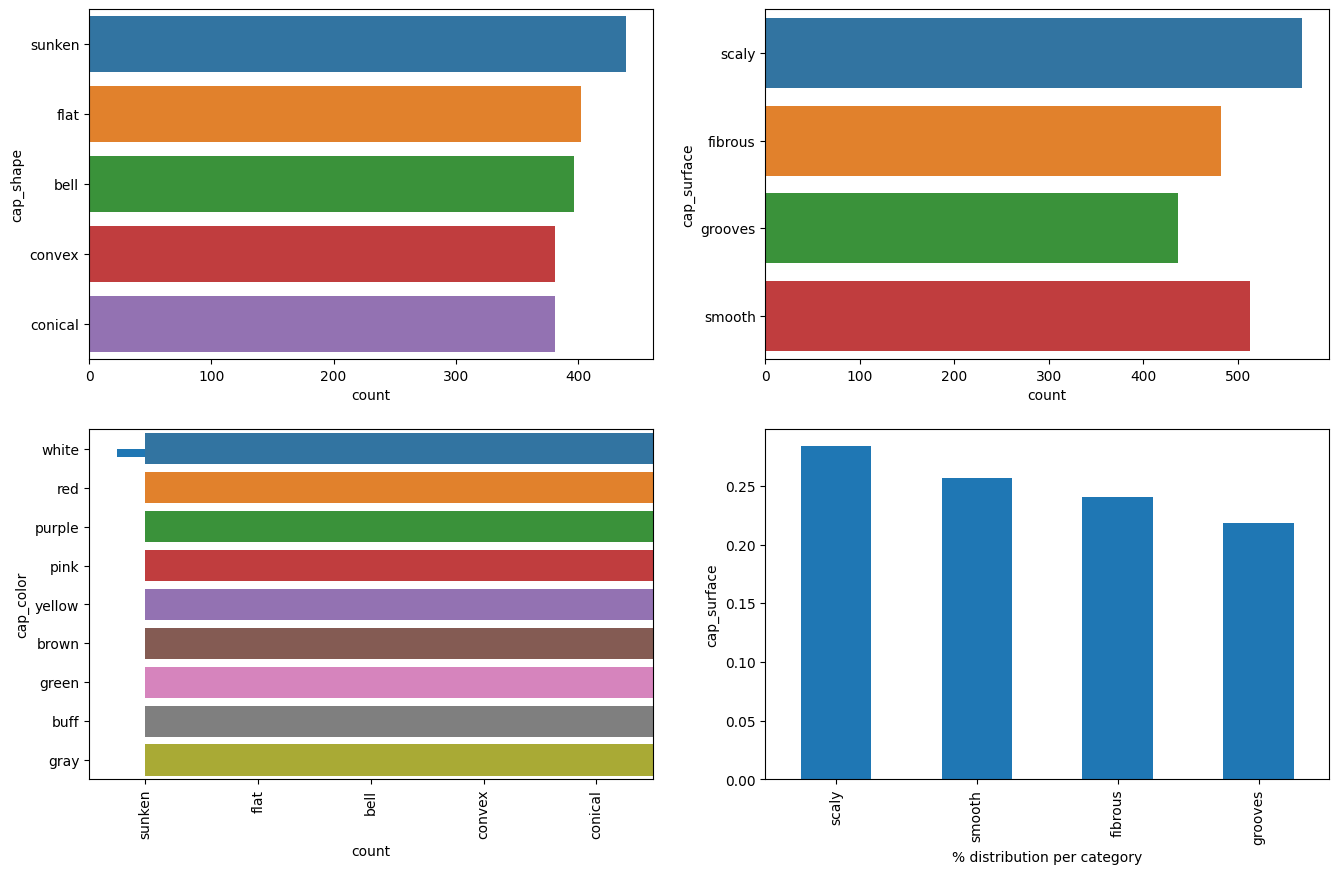

In [18]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [19]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

/var/folders/p0/vrfqq_vd7qs5cnv6g_1n5vnw0000gn/T/ipykernel_13303/2239169671.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
/Users/kirtisailinaidu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


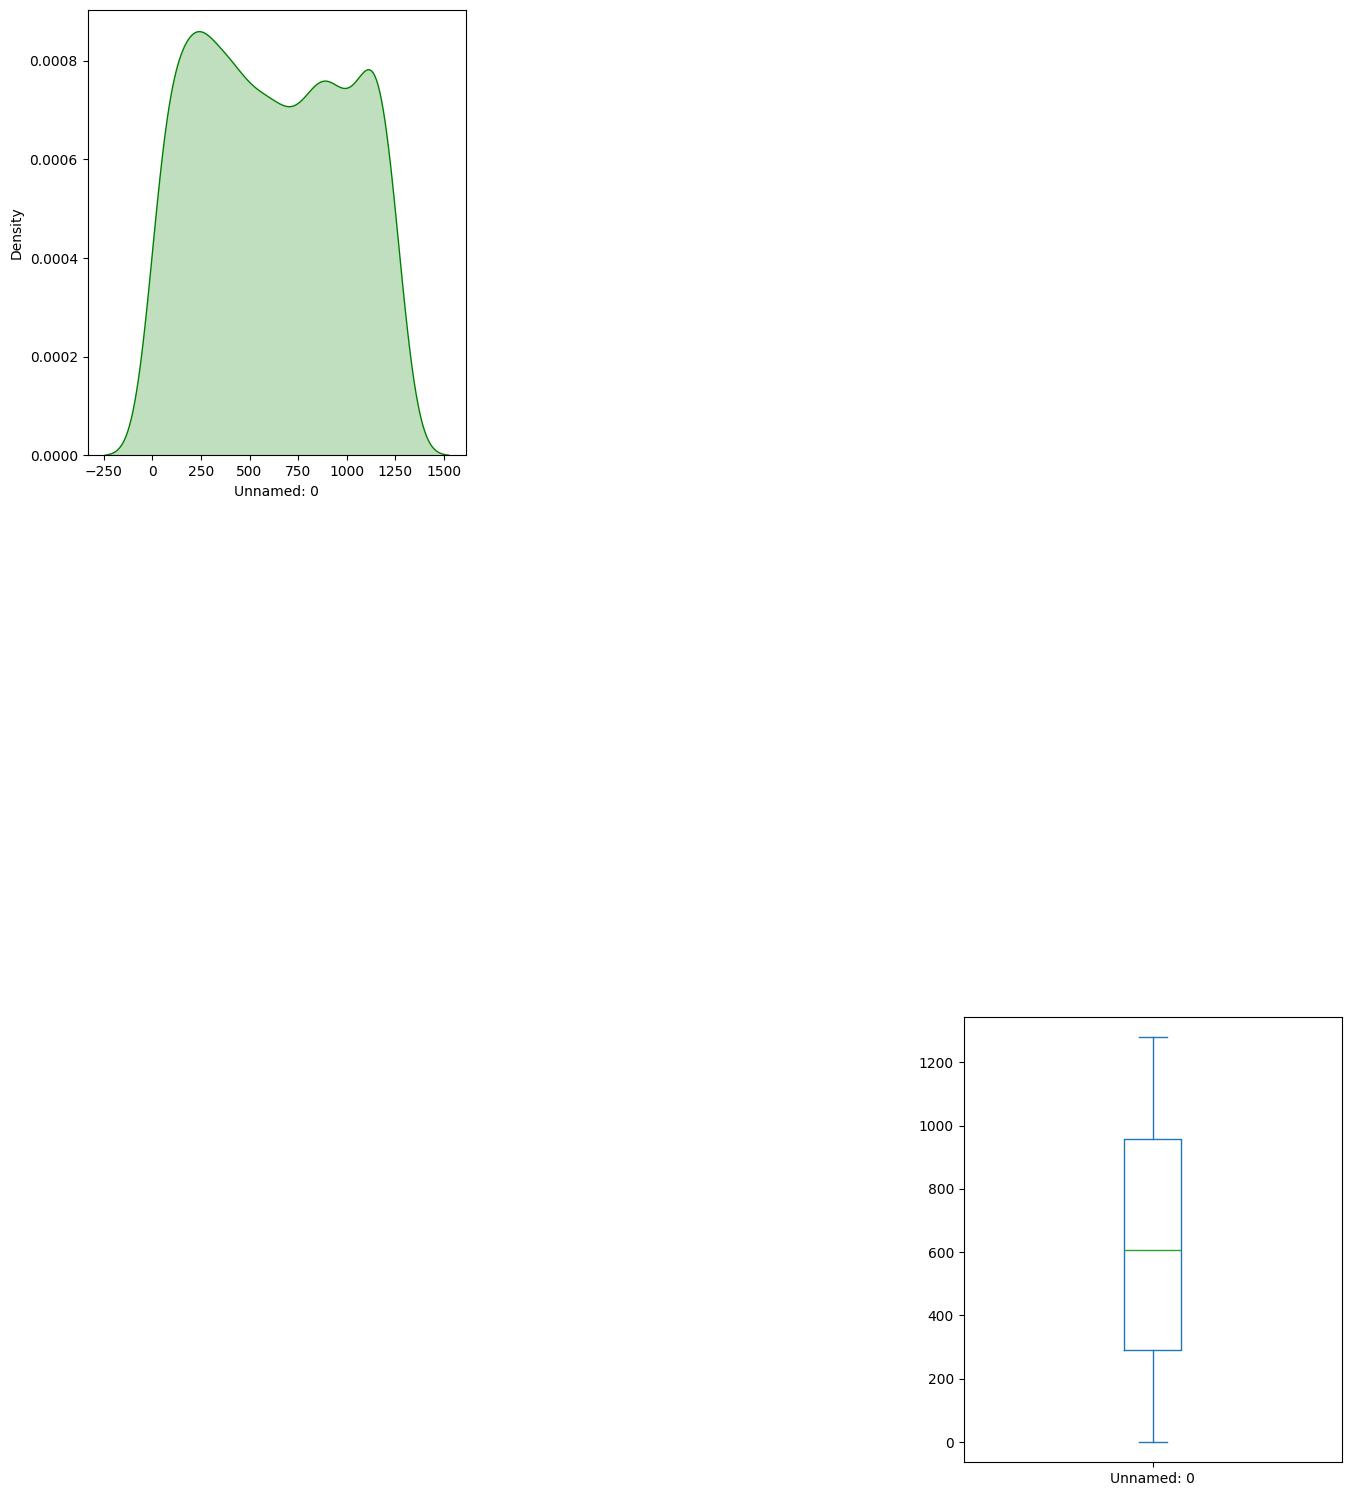

,Unnamed: 0
skewness,0.052422
kurtosis,-1.254726


In [20]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [22]:
print(df1.shape)

if df1.shape[1] > 30:
    X = df1.iloc[:, 2:30]
    y = df1.iloc[:, 30]
else:
    print("DataFrame does not have enough columns")

(2000, 26)
DataFrame does not have enough columns


In [23]:
mapping = {'small': 1, 'large': 2}

In [25]:
import pandas as pd

data = {'column_1': [1, 2, 3, 4], 'column_2': [5, 6, 7, 8], 'column_3': [9, 10, 11, 12]}
df1 = pd.DataFrame(data)

X = df1.iloc[:, 1:3]
y = df1.iloc[:, 0]

mapping = {1: 'one', 2: 'two', 3: 'three', 4: 'four'}

y = y.replace(mapping)

print(y)

0      one
1      two
2    three
3     four
Name: column_1, dtype: object


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

data = {'column_1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'column_2': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'column_3': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]}
df1 = pd.DataFrame(data)

X = df1[['column_1', 'column_2']]
y = df1['column_3']  

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_linear = SVC(kernel="linear")
model_linear.fit(x_train, y_train)

pred_test_linear = model_linear.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.0


In [28]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.0


In [29]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.0


In [30]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 1.0


In [31]:
ytt = y_train.to_numpy()

In [32]:
pca = PCA(n_components = 2)

In [33]:
x_train2 = pca.fit_transform(x_train)

In [34]:
model_linear.fit(x_train2,ytt)

SVC(kernel='linear')

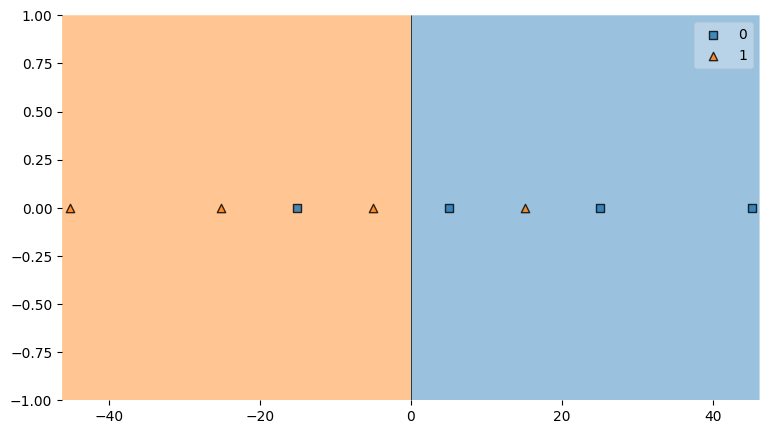

In [35]:
plot_decision_regions(x_train2,ytt, clf=model_linear)
plt.show()